# Cargando y visualizando datos desde OpenStreetMap

### Se importan los modulos necesarios de Python

In [50]:
import pandas as pd
import geopandas as gpd
import shapely
from shapely.geometry import *
import matplotlib.pyplot as plt
import pyrosm
from pyrosm.data import sources


### Se carga el archivo .shp de Chile

In [51]:
pais = gpd.read_file('/home/jsepulveda/osm/chile-latest-free.shp.zip')
pais.head()

osm_id  code    fclass                        name    type  \
0  23393750  1500  building  Terminal de Buses Santiago    None   
1  23477423  1500  building             Alto Las Condes  retail   
2  23674761  1500  building                   Cinepolis    None   
3  23675225  1500  building                       Lider    None   
4  24402037  1500  building                       Lider    None   

                                            geometry  
0  POLYGON ((-70.68894 -33.45415, -70.68759 -33.4...  
1  POLYGON ((-70.54771 -33.39012, -70.54770 -33.3...  
2  POLYGON ((-70.57129 -33.44724, -70.57090 -33.4...  
3  POLYGON ((-70.57850 -33.48625, -70.57850 -33.4...  
4  POLYGON ((-70.51295 -33.36918, -70.51288 -33.3...

### Se carga el archivo .shp de la Región Metropolitana con las comunas urbanas

In [52]:
rm = gpd.read_file('/home/jsepulveda/urban_comunas.shp')
rm_clean = rm.drop(['REGION','NOM_REGION','PROVINCIA','NOM_PROVIN','COMUNA','SHAPE_Leng','SHAPE_Area'],axis=1)
rm_clean = rm_clean.set_crs("EPSG:4326")
rm_clean.head()

NOM_COMUNA                                           geometry
0     PUDAHUEL  POLYGON ((-70.78216 -33.41714, -70.78216 -33.4...
1  CERRO NAVIA  POLYGON ((-70.71927 -33.41334, -70.71888 -33.4...
2        LAMPA  POLYGON ((-70.71901 -33.32442, -70.71902 -33.3...
3   HUECHURABA  POLYGON ((-70.60223 -33.38550, -70.60222 -33.3...
4     CONCHALÍ  POLYGON ((-70.69041 -33.36579, -70.69028 -33.3...

### Se intersectan ambos geodataframes para encontrar los POI de la RM

In [53]:
rm_osm = gpd.sjoin(pais,rm_clean, how='inner', op='intersects').reset_index().drop(['index_right','index'], axis = 1)
rm_osm.head()

osm_id  code    fclass                        name           type  \
0  23393750  1500  building  Terminal de Buses Santiago           None   
1  24964212  1500  building            Estación Central  train_station   
2  33102634  1500  building                       Lider           None   
3  33102659  1500  building                     Block 2     apartments   
4  33102661  1500  building                     Block 8     apartments   

                                            geometry        NOM_COMUNA  
0  POLYGON ((-70.68894 -33.45415, -70.68759 -33.4...  ESTACIÓN CENTRAL  
1  POLYGON ((-70.67941 -33.45270, -70.67929 -33.4...  ESTACIÓN CENTRAL  
2  POLYGON ((-70.69281 -33.45195, -70.69197 -33.4...  ESTACIÓN CENTRAL  
3  POLYGON ((-70.69165 -33.44908, -70.69147 -33.4...  ESTACIÓN CENTRAL  
4  POLYGON ((-70.69058 -33.44786, -70.69051 -33.4...  ESTACIÓN CENTRAL

### Se printean los elementos de la RM por comuna

<AxesSubplot:>

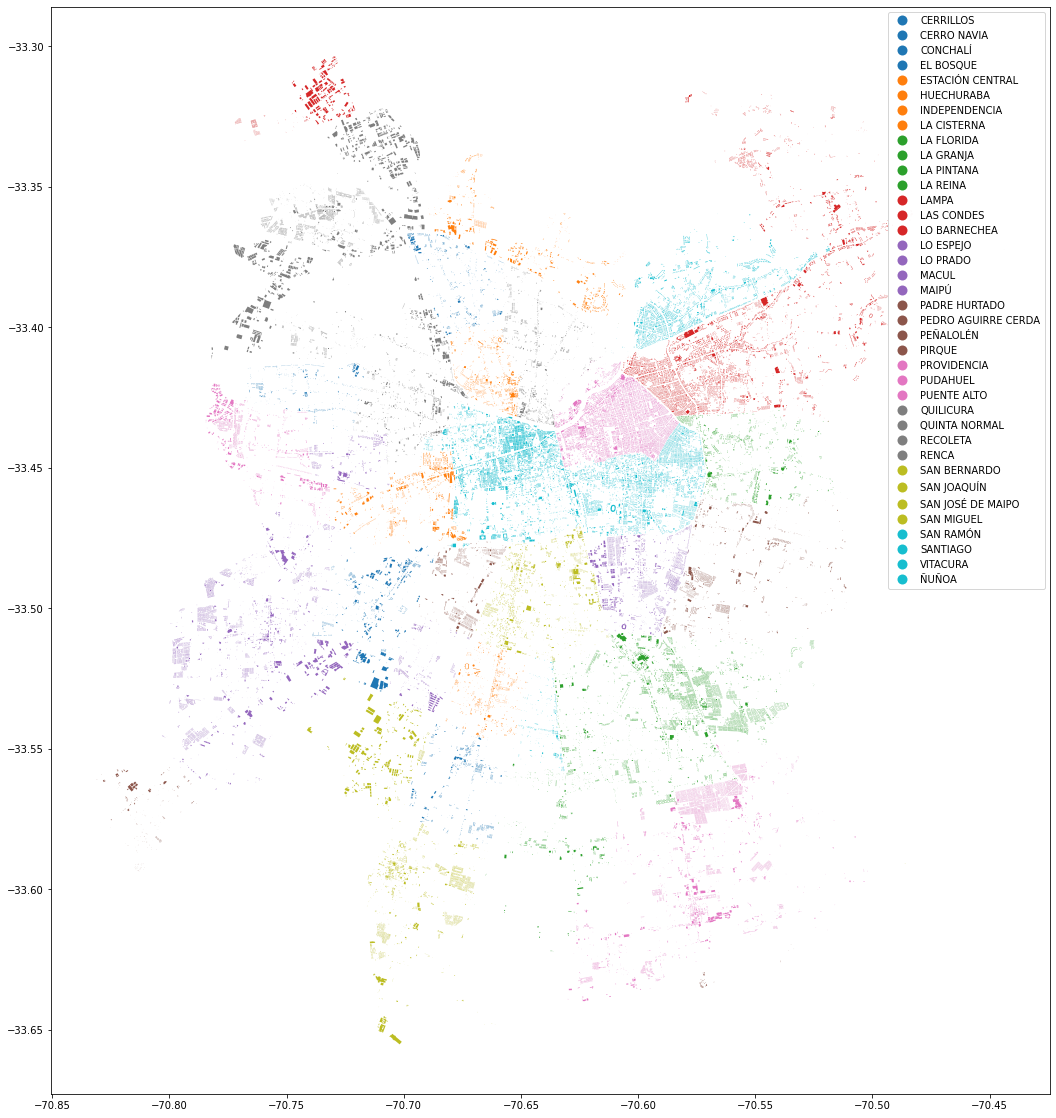

In [54]:
rm_osm.plot(figsize=(20,20), linewidth=5, column='NOM_COMUNA', legend=True)

# ##################################################################

### Se utiliza unary union para sacar el poligono de la RM

<AxesSubplot:>

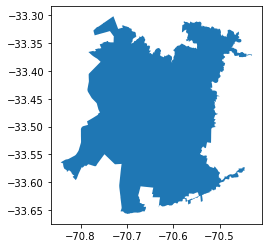

In [55]:
limites = rm_clean.geometry.unary_union
limites_gpd = gpd.GeoDataFrame(geometry=[limites],crs=rm_clean.crs)
limites_gpd.plot()

### Se lee el osm utilizando como bounding box el poligono de la RM

In [56]:
rm_osm = pyrosm.OSM('/home/jsepulveda/osm/chile-latest.osm.pbf', bounding_box = limites)

In [57]:
pois = rm_osm.get_pois()

In [58]:
pois.head()

changeset        lon   timestamp  version         id  \
0        0.0 -70.651115  1553390258       18     386313   
1        0.0 -70.628487  1342745401        7  133663460   
2        0.0 -70.614647  1525957984        6  133769438   
3        0.0 -70.630402  1578789062        7  223920407   
4        0.0 -70.525055  1398287198        7  240434655   

                                  tags        lat    addr:city addr:country  \
0                                 None -33.439552     Santiago         None   
1  {"alt_name":"Ciudadano Restaurant"} -33.446224         None         None   
2                                 None -33.446537  Providencia           CL   
3             {"wikidata":"Q28501698"} -33.435596         None           CL   
4                                 None -33.376240   Las Condes           CL   

  addr:full  ... information museum tourism   zoo  \
0      None  ...        None   None    None  None   
1      None  ...        None   None    None  None   
2      None  ...        None   None    None  None   
3      None  ...        None   None  museum  None   
4      None  ...        None   None    None  None   

                      geometry osm_type cafe school water wholesale  
0  POINT (-70.65112 -33.43955)     node  NaN    NaN   NaN       NaN  
1  POINT (-70.62849 -33.44622)     node  NaN    NaN   NaN       NaN  
2  POINT (-70.61465 -33.44654)     node  NaN    NaN   NaN       NaN  
3  POINT (-70.63040 -33.43560)     node  NaN    NaN   NaN       NaN  
4  POINT (-70.52505 -33.37624)     node  NaN    NaN   NaN       NaN  

[5 rows x 57 columns]

### Se muestran los POI segun su tipo de osm

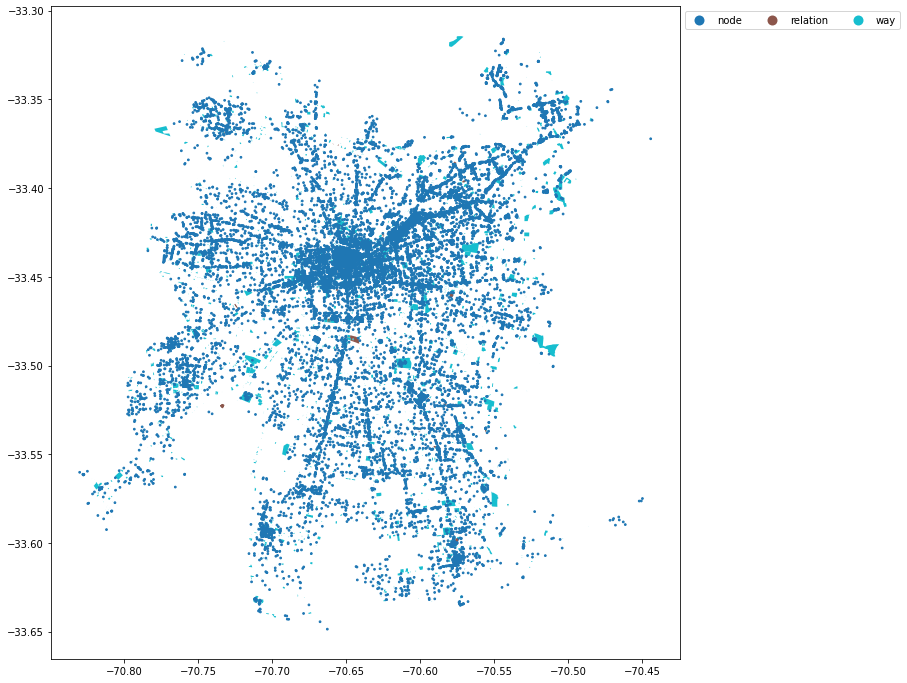

In [10]:
ax = pois.plot(column='osm_type', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))

### Se muestran los POI segun su comuna

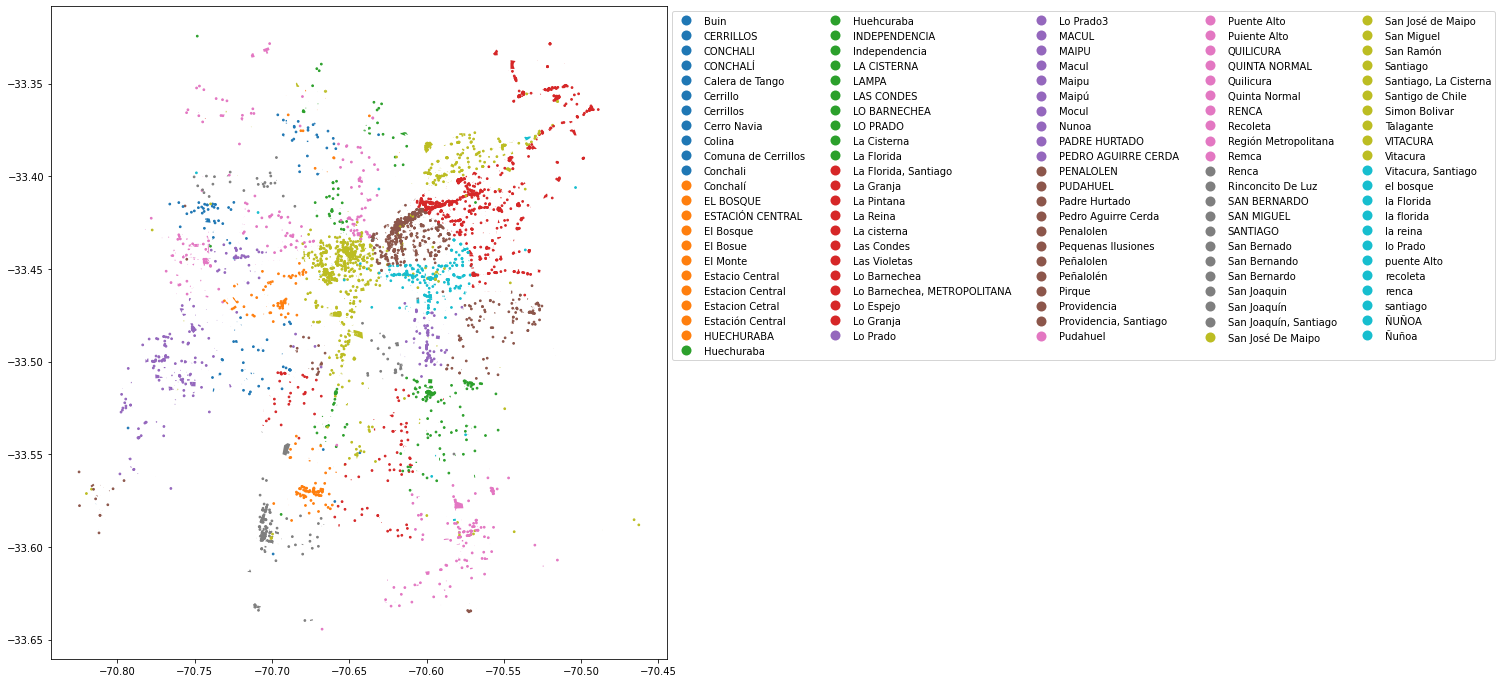

In [11]:
ax = pois.plot(column='addr:city', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))

### Se muestran los POI de la categoria turismo

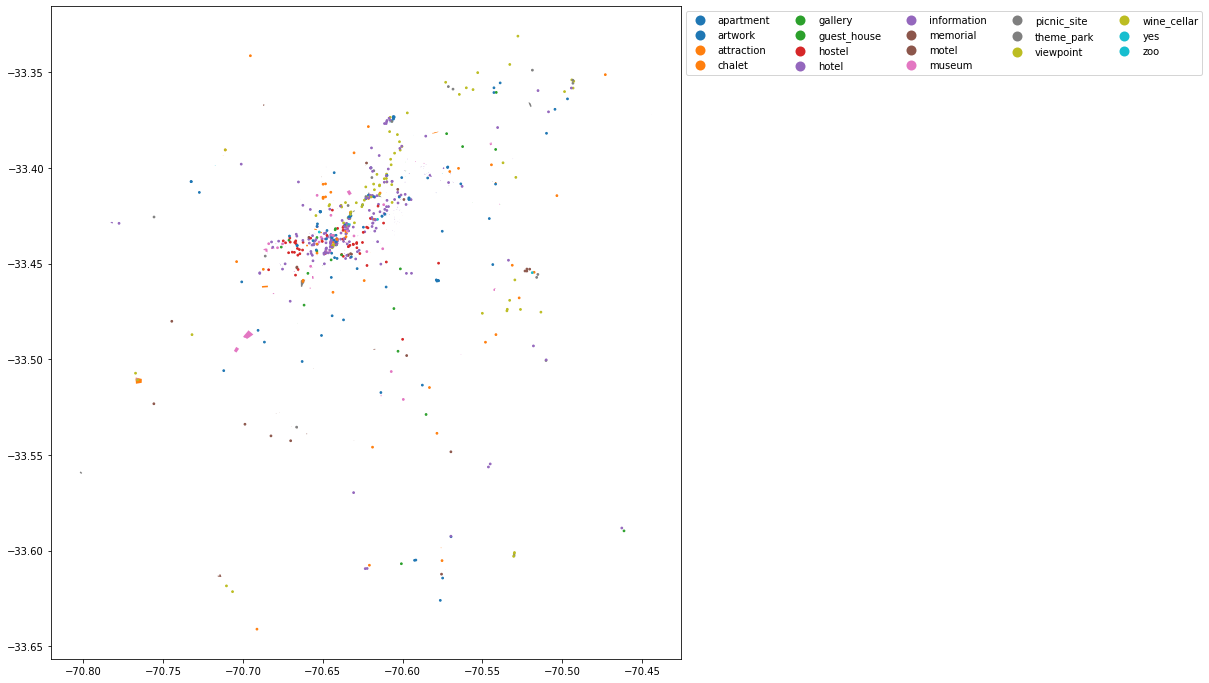

In [12]:
tourism = pois.dropna(subset=['tourism'])
ax = tourism.plot(column='tourism', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))

### Se muestran los POI de la categoria tiendas

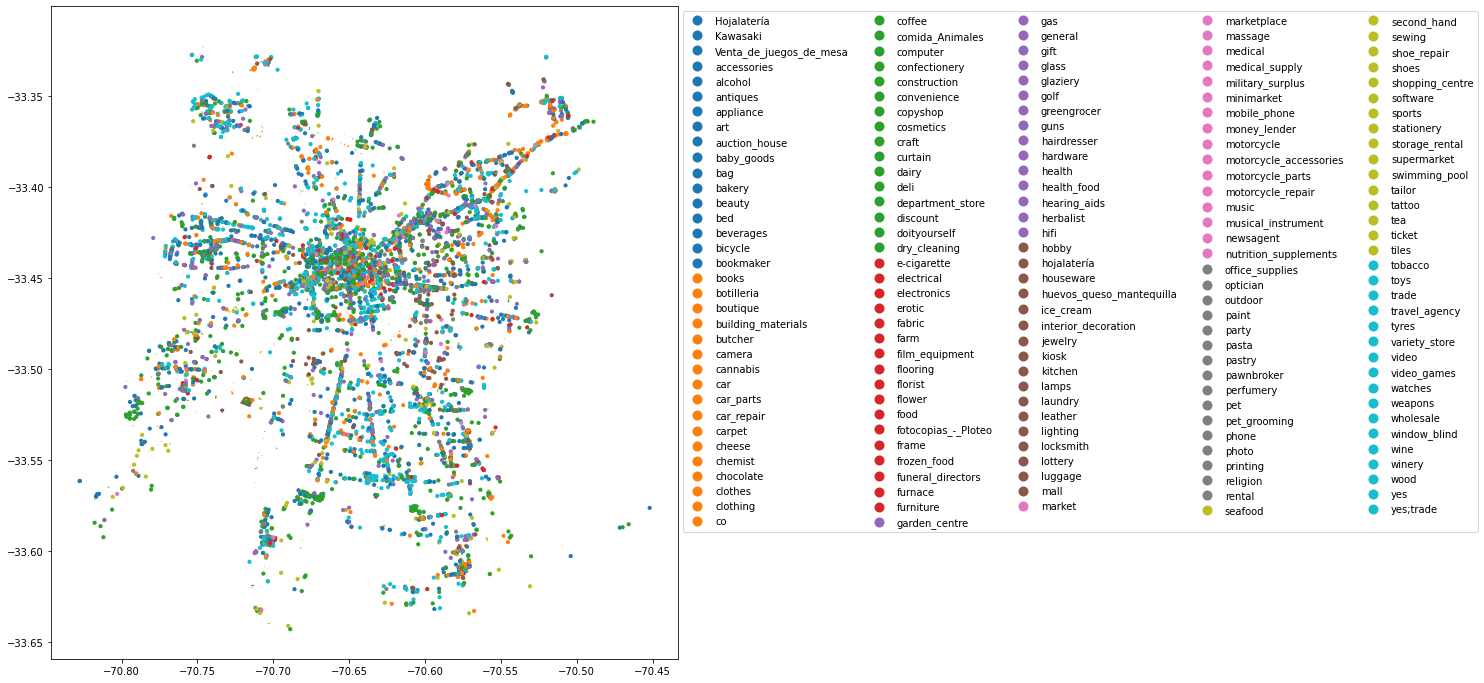

In [11]:
shop = pois.dropna(subset=['shop'])
ax = shop.plot(column='shop', markersize=10, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))

### Se muestran los POI de la categoria amenidad

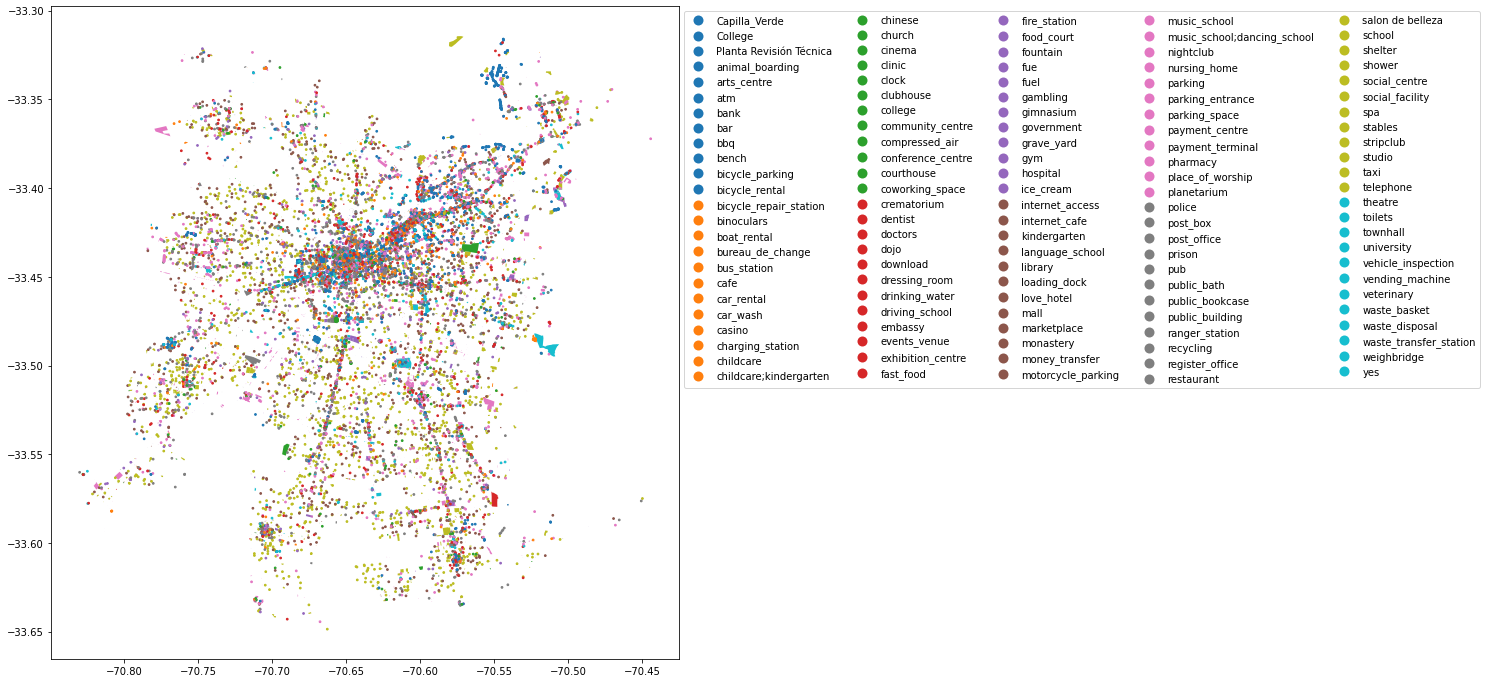

In [59]:
amenity = pois.dropna(subset=['amenity'])
ax = amenity.plot(column='amenity', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))

### Se limpia el geodataframe dejando solo las categorias de pois Recreacion y Educacion

In [60]:
amenity_clean = amenity.copy()
list_recreation_pois = ['pub','cafe','restaurant','cinema','fast_food','nightclub','theatre','bar','ice_cream','mall','food_court','casino']
list_education_pois = ['childcare;kindergarten','College','language_school','childcare','kindergarten','college','university','school']
for index, row in amenity_clean.iterrows():
    if row['amenity'] in list_recreation_pois:
        amenity_clean.at[index, 'amenity'] = 'Recreacion'
    if row['amenity'] in list_education_pois:
        amenity_clean.at[index, 'amenity'] = 'Educacion'


In [61]:
indexNames = amenity_clean[(amenity_clean['amenity']!= 'Recreacion') & (amenity_clean['amenity']!='Educacion')].index
amenity_clean.drop(indexNames,inplace=True)

### Se muestran los pois de Educacion y Recreacion de la Región Metropolitana

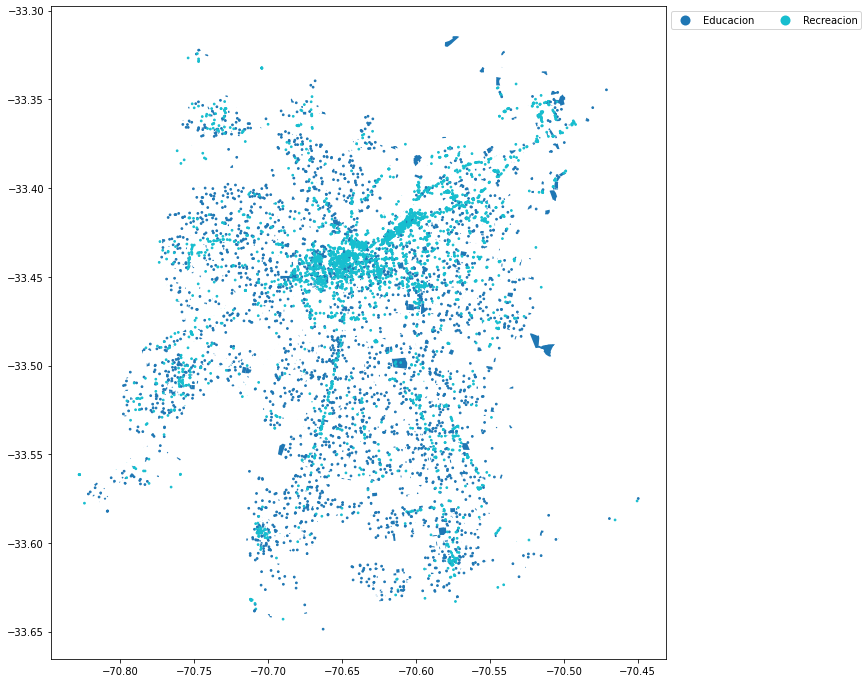

In [62]:
ax = amenity_clean.plot(column='amenity', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))

### Se lee el archivo csv con las torres y sus ubicaciones y se transforma en GDF

In [63]:
urban_distritos = gpd.read_file('/home/jsepulveda/urban_distritos.shp')
urban_comunas = gpd.read_file('/home/jsepulveda/urban_comunas.shp')
urban_distritos.head()
urban_comunas.head()

REGION                        NOM_REGION  PROVINCIA NOM_PROVIN  COMUNA  \
0      13  REGIÓN METROPOLITANA DE SANTIAGO        131   SANTIAGO   13124   
1      13  REGIÓN METROPOLITANA DE SANTIAGO        131   SANTIAGO   13103   
2      13  REGIÓN METROPOLITANA DE SANTIAGO        133  CHACABUCO   13302   
3      13  REGIÓN METROPOLITANA DE SANTIAGO        131   SANTIAGO   13107   
4      13  REGIÓN METROPOLITANA DE SANTIAGO        131   SANTIAGO   13104   

    NOM_COMUNA  SHAPE_Leng  SHAPE_Area  \
0     PUDAHUEL    0.720176    0.019124   
1  CERRO NAVIA    0.170180    0.001076   
2        LAMPA    1.046716    0.043569   
3   HUECHURABA    0.326251    0.004350   
4     CONCHALÍ    0.138248    0.001077   

                                            geometry  
0  POLYGON ((-70.78216 -33.41714, -70.78216 -33.4...  
1  POLYGON ((-70.71927 -33.41334, -70.71888 -33.4...  
2  POLYGON ((-70.71901 -33.32442, -70.71902 -33.3...  
3  POLYGON ((-70.60223 -33.38550, -70.60222 -33.3...  
4  POLYGON ((-70.69041 -33.36579, -70.69028 -33.3...

In [64]:
from shapely import wkt
torres = pd.read_csv('/home/jsepulveda/torres_clean.csv')
torres['geometry'] = torres['geometry'].apply(wkt.loads)
torres_gdf = gpd.GeoDataFrame(torres, crs='epsg:4326')
torres_gdf.head()


rinhead                     geometry   NOM_COMUNA
0   11SEP  POINT (-70.61111 -33.42227)  PROVIDENCIA
1   ALBER  POINT (-70.63374 -33.43539)  PROVIDENCIA
2   ATICF  POINT (-70.60563 -33.42468)  PROVIDENCIA
3   AVIUM  POINT (-70.62628 -33.44031)  PROVIDENCIA
4   BARRO  POINT (-70.61785 -33.43059)  PROVIDENCIA

### Se visualiza toda la información recopilada, el mapa de la RM dividido por comunas y distritos con los pois de recreación y eduación, y finalmente las torres

In [65]:
import matplotlib.patheffects as path_effects

In [66]:
try:
    from adjustText import adjust_text
except:
    adjust_text = lambda *x,**y: x

In [67]:
text_style = dict(horizontalalignment='center', fontsize=13, fontweight='bold'
                 ,color='white', fontstretch='condensed')
text_effects = [path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Normal()]

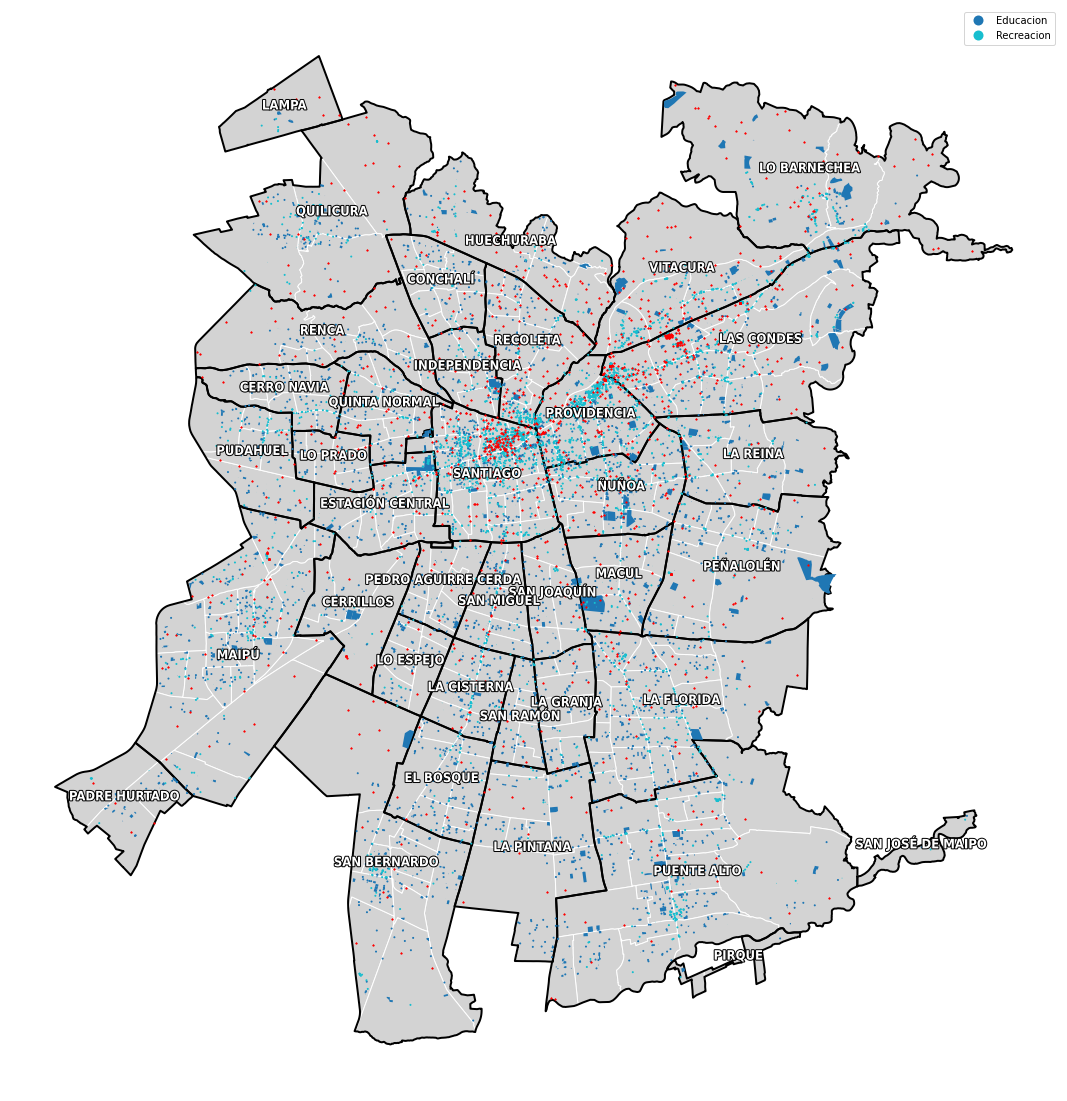

In [83]:
ax = urban_distritos.plot(figsize=(20,20),linewidth=1, edgecolor='white', facecolor='lightgray')
ax = urban_comunas.plot(linewidth=2, edgecolor='black', facecolor="none", ax=ax)
ax = amenity_clean.plot(column='amenity', figsize=(20,20),markersize=1,legend=True,ax=ax)
ax = torres_gdf.plot(marker='*', color='red',markersize=2,ax=ax)


texts = []
for comuna, centroid in zip(urban_comunas['NOM_COMUNA'], urban_comunas.centroid):
    t = ax.text(centroid.x, centroid.y, comuna, **text_style)
    t.set_path_effects(text_effects)
    texts.append(t)
adjust_text(texts, autoalign='y', lim=1)
    
ax.axis('off');

### #########################################################################################


### Se importan los modulos para trabajar con archivos GTFS del metro de Santiago


In [100]:
import gtfs_functions as gtfs

### Se parsean las variables del GTFS

In [101]:
routes, stops, stop_times, trips, shapes = gtfs.import_gtfs('/home/jsepulveda/metrol6/gtfsv40.zip')

In [102]:
trips_routes = trips.drop_duplicates('shape_id').merge(routes)
shapes_trips_routes = shapes.merge(trips_routes)

In [103]:
shapes_trips_routes.columns

Index(['shape_id', 'geometry', 'trip_id', 'route_id', 'service_id',
       'direction_id', 'agency_id', 'route_short_name', 'route_long_name',
       'route_desc', 'route_type', 'route_url', 'route_color',
       'route_text_color'],
      dtype='object')

In [104]:
stop_agency = trips_routes.drop_duplicates('route_id').merge(stop_times)[['stop_id','agency_id']]

In [105]:
stops = stops.merge(stop_agency)

In [106]:
stops.head()

stop_id stop_code                                   stop_name stop_url  \
0     PB1       PB1                PB1-Venezuela / Esq. Bolivia      NaN   
1     PB2       PB2    PB2-Venezuela / Esq. H. De La Concepción      NaN   
2     PB3       PB3  PB3-Reina De Chile / Esq. Avenida El Salto      NaN   
3     PB4       PB4          PB4-Pedro Donoso / Esq.  Santa Ana      NaN   
4     PB4       PB4          PB4-Pedro Donoso / Esq.  Santa Ana      NaN   

                      geometry agency_id  
0  POINT (-70.62310 -33.40455)        TS  
1  POINT (-70.62664 -33.40245)        TS  
2  POINT (-70.62973 -33.40122)        TS  
3  POINT (-70.63298 -33.39923)        TS  
4  POINT (-70.63298 -33.39923)        TS

### Se filtran las paradas por el agency_id = M que corresponde al Metro de Santiago

In [108]:
stops = stops[stops.agency_id == 'M']
stops.head()

stop_id stop_code            stop_name  \
18309       1        AG      Camino Agrícola   
18310       1        AG      Camino Agrícola   
18311       2        AH  San Alberto Hurtado   
18312       3        AL            Alcántara   
18313       4        AN            Santa Ana   

                                               stop_url  \
18309      http://www.metro.cl/estacion/camino-agricola   
18310      http://www.metro.cl/estacion/camino-agricola   
18311  http://www.metro.cl/estacion/san-alberto-hurtado   
18312            http://www.metro.cl/estacion/alcantara   
18313         http://www.metro.cl/estacion/santa-ana-l2   

                          geometry agency_id  
18309  POINT (-70.61753 -33.49159)         M  
18310  POINT (-70.61753 -33.49159)         M  
18311  POINT (-70.69244 -33.45411)         M  
18312  POINT (-70.58945 -33.41533)         M  
18313  POINT (-70.65985 -33.43832)         M

<AxesSubplot:>

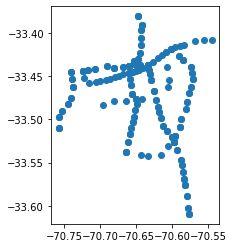

In [94]:
stops.plot()

### Se filtran las rutas para plotear las rutas del Metro de Santiago

<AxesSubplot:>

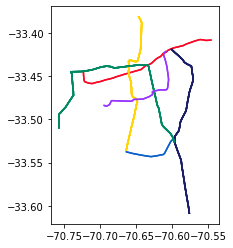

In [78]:
shapes_trips_routes = shapes_trips_routes[shapes_trips_routes.agency_id == 'M']
shapes_trips_routes.plot(color='#'+ shapes_trips_routes.route_color)

### Se filtra para plotear solo la Linea 6

<AxesSubplot:>

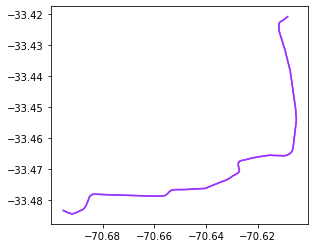

In [84]:
index = shapes_trips_routes[shapes_trips_routes['route_short_name']!= 'L6'].index
shapes_trips_routes.drop(index, inplace = True)
shapes_trips_routes.plot(color='#'+ shapes_trips_routes.route_color)

In [90]:
shapes_trips_routes.head()

shape_id                                           geometry  \
940  L6-I_V40  LINESTRING (-70.69542 -33.48338, -70.69335 -33...   
941  L6-R_V40  LINESTRING (-70.60817 -33.42077, -70.60981 -33...   

            trip_id route_id service_id  direction_id agency_id  \
940  L6-I-L_V40-M01   L6_V40      L_V40             0         M   
941  L6-R-L_V40-M01   L6_V40      L_V40             1         M   

    route_short_name                  route_long_name route_desc  route_type  \
940               L6  Línea6 (Cerrillos - Los Leones)        NaN           1   
941               L6  Línea6 (Cerrillos - Los Leones)        NaN           1   

    route_url route_color route_text_color  
940       NaN      9933FF           000000  
941       NaN      9933FF           000000

### Se agrega la Linea 6 al mapa anteriormente generado

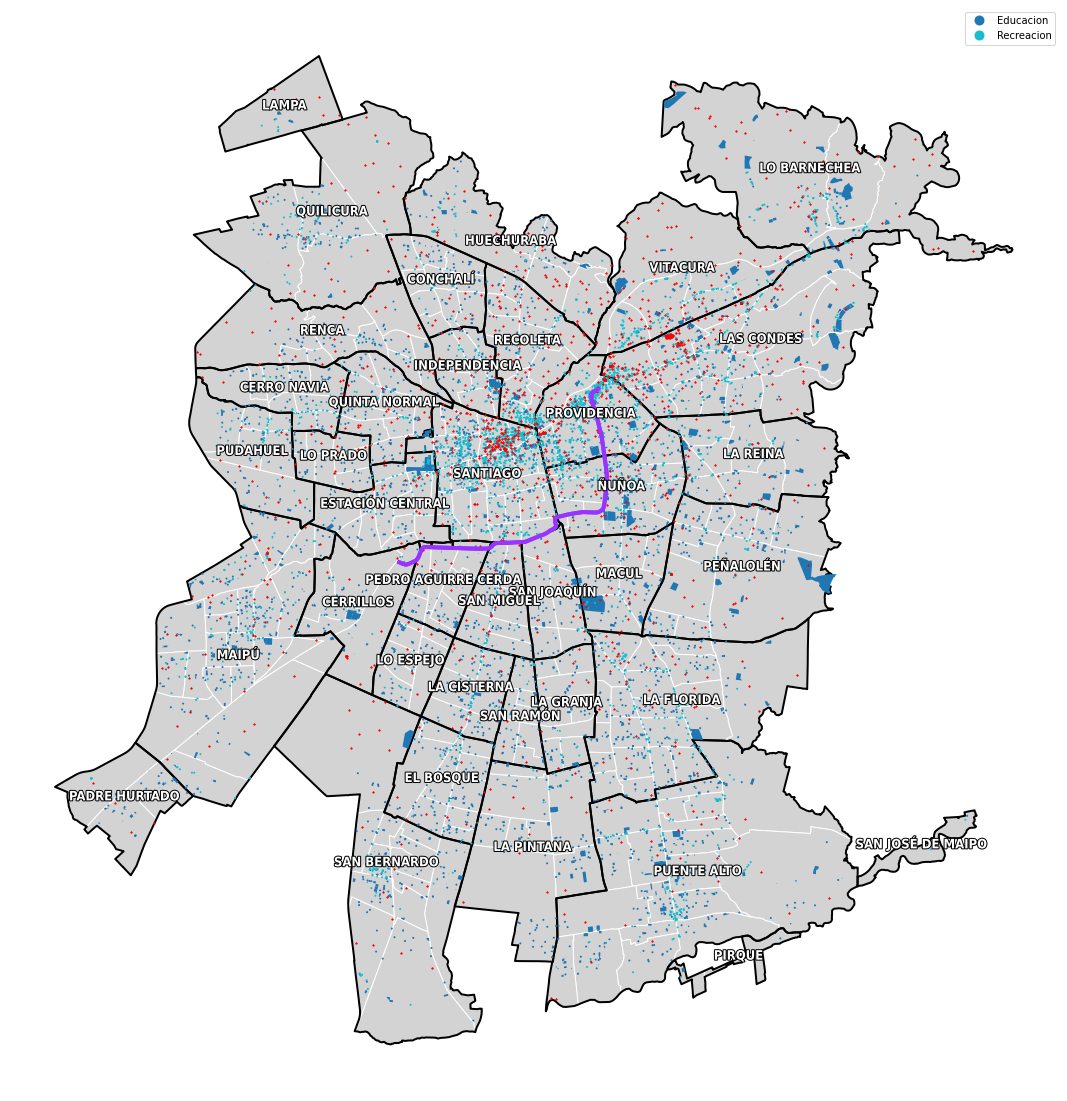

In [91]:
ax = urban_distritos.plot(figsize=(20,20),linewidth=1, edgecolor='white', facecolor='lightgray')
ax = urban_comunas.plot(linewidth=2, edgecolor='black', facecolor="none", ax=ax)
ax = amenity_clean.plot(column='amenity', figsize=(20,20),markersize=1,legend=True,ax=ax)
ax = torres_gdf.plot(marker='*', color='red',markersize=2,ax=ax)
ax = shapes_trips_routes.plot(color='#'+ shapes_trips_routes.route_color,linewidth=4,ax=ax)


texts = []
for comuna, centroid in zip(urban_comunas['NOM_COMUNA'], urban_comunas.centroid):
    t = ax.text(centroid.x, centroid.y, comuna, **text_style)
    t.set_path_effects(text_effects)
    texts.append(t)
adjust_text(texts, autoalign='y', lim=1)
    
ax.axis('off');